<a href="https://colab.research.google.com/github/donajoseph2001/Election_Data/blob/main/twitter_ensemble_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

# Read the additional CSV files
data1 = pd.read_csv('/content/drive/MyDrive/ModiRelatedTweetsWithSentiment - ModiRelatedTweetsWithSentiment.csv')
data2 = pd.read_csv('/content/drive/MyDrive/RahulRelatedTweetsWithSentiment.csv')

data=pd.concat([data1,data2],ignore_index=True)


import re

def remove_emojis(text):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
        "]+", re.UNICODE)
    return emoj.sub(r' ', text)

data['Tweet'] = data['Tweet'].astype(str).apply(remove_emojis)

# Encode the target variable ('Emotion')
label_encoder = LabelEncoder()
data['Emotion'] = label_encoder.fit_transform(data['Emotion'])


# Initialize a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the preprocessed tweets into numerical representations
X = vectorizer.fit_transform(data['Tweet'])

# Extract the target variable (if available)
y = data['Emotion']  # Assuming 'Party' is the target variable column



# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Ensemble Model: Define an ensemble model and select the base models. Here, we'll use 
#Random Forest Classifier, Gradient Boosting Classifier, and Logistic Regression.
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# Initialize the base models
model1 = RandomForestClassifier()
model2 = GradientBoostingClassifier()
model3 = LogisticRegression()

# Create the ensemble model using VotingClassifier
ensemble = VotingClassifier(estimators=[('rf', model1), ('gb', model2), ('lr', model3)], voting='hard')
#voting strategy as "hard" (majority voting) COMMENT 3


#Train and Evaluate the Ensemble: Fit the 
#ensemble model on the training data and evaluate its performance on the test data.




In [22]:
# Train the ensemble model
ensemble.fit(X_train, y_train)

# Evaluate the ensemble model
accuracy = ensemble.score(X_test, y_test)
print("Ensemble Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Ensemble Accuracy: 0.758072590738423


In [39]:
# Train and evaluate each base model

from sklearn.metrics import accuracy_score

model1.fit(X_train, y_train)
model1_accuracy = accuracy_score(y_test, model1.predict(X_test))
print("Model 1 Accuracy:", model1_accuracy)


model3.fit(X_train, y_train)
model3_accuracy = accuracy_score(y_test, model3.predict(X_test))
print("Model 3 Accuracy:", model3_accuracy)



Model 1 Accuracy: 0.7551939924906133


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model 3 Accuracy: 0.783854818523154
Model 2 Accuracy: 0.6984981226533167


In [41]:
#Prediction on Another Dataset: Once the ensemble model is trained, you can use it to make predictions on a new dataset.

# Load the new dataset for prediction
new_data = pd.read_csv('/content/drive/MyDrive/IndianElection19TwitterData.csv')

# Perform any necessary preprocessing on the new data

# Fit and transform the new data using the same vectorizer
X_new = vectorizer.transform(new_data['Tweet'])

# Make predictions using the ensemble model
predictions = model3.predict(X_new)

# Optionally, you can decode the predictions if necessary
decoded_predictions = label_encoder.inverse_transform(predictions)

new_data['Emotion']=decoded_predictions

new_data.head(20)



,Unnamed: 0,Date,User,Tweet,Emotion
0,0,2019-05-18 23:50:47+00:00,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...,neg
1,1,2019-05-18 23:20:00+00:00,airnewsalerts,Trinamool Congress Sitting MP Abhishek Banerje...,neg
2,2,2019-05-18 23:00:03+00:00,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...,neg
3,3,2019-05-18 22:53:54+00:00,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...,neg
4,4,2019-05-18 22:20:48+00:00,TheNirbhay1,PM Modi creates a new record of being the only...,pos
5,5,2019-05-18 22:16:26+00:00,ankitgarg20,My somewhat biased exit poll for India electio...,neg
6,6,2019-05-18 21:51:56+00:00,pkm1999,@rupasubramanya Even assuming statistical erro...,neg
7,7,2019-05-18 21:43:15+00:00,rohanmodi,@abhijitmajumder Small correction. Nobody gets...,neg
8,8,2019-05-18 21:36:20+00:00,Jmend124,We still fucking dancing 🕺🏼 ♏️ #INC,neg
9,9,2019-05-18 21:22:29+00:00,ShakeChilli,@abhijitmajumder Appointment of Successor! \n\...,neg


In [42]:
# Classify tweets
def classify_tweet(tweet):
    if '#bjp' in tweet.lower() or 'modi' in tweet.lower() or 'narendramodi' in tweet.lower():
        return 'BJP'
    else:
        return 'INC'

new_data['Party'] = new_data['Tweet'].apply(classify_tweet)
new_data.head(20)

,Unnamed: 0,Date,User,Tweet,Emotion,Party
0,0,2019-05-18 23:50:47+00:00,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...,neg,BJP
1,1,2019-05-18 23:20:00+00:00,airnewsalerts,Trinamool Congress Sitting MP Abhishek Banerje...,neg,BJP
2,2,2019-05-18 23:00:03+00:00,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...,neg,BJP
3,3,2019-05-18 22:53:54+00:00,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...,neg,BJP
4,4,2019-05-18 22:20:48+00:00,TheNirbhay1,PM Modi creates a new record of being the only...,pos,BJP
5,5,2019-05-18 22:16:26+00:00,ankitgarg20,My somewhat biased exit poll for India electio...,neg,BJP
6,6,2019-05-18 21:51:56+00:00,pkm1999,@rupasubramanya Even assuming statistical erro...,neg,BJP
7,7,2019-05-18 21:43:15+00:00,rohanmodi,@abhijitmajumder Small correction. Nobody gets...,neg,BJP
8,8,2019-05-18 21:36:20+00:00,Jmend124,We still fucking dancing 🕺🏼 ♏️ #INC,neg,INC
9,9,2019-05-18 21:22:29+00:00,ShakeChilli,@abhijitmajumder Appointment of Successor! \n\...,neg,BJP


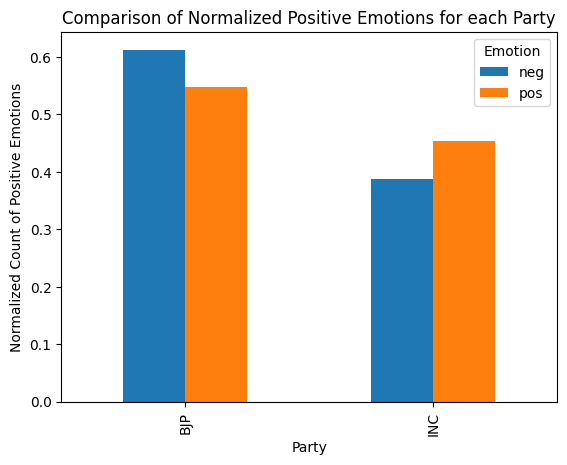

In [43]:
import matplotlib.pyplot as plt
party_emotions = new_data.groupby('Party')['Emotion'].value_counts().unstack()

# Normalize the counts
party_positive_normalized = party_emotions / party_emotions.sum()

# Plot the histogram
party_positive_normalized.plot(kind='bar')

# Set the labels and title
plt.xlabel('Party')
plt.ylabel('Normalized Count of Positive Emotions')
plt.title('Comparison of Normalized Positive Emotions for each Party')

# Show the plot
plt.show()

In [44]:
# Group the data by party and emotion, and calculate the count of positive emotions
party_positive_counts = new_data[new_data['Emotion'] == 'pos'].groupby('Party').size()

# Calculate the total counts for each party
party_total_counts = new_data.groupby('Party').size()

# Calculate the popularity for each party
party_popularity = party_positive_counts / party_total_counts

print(party_popularity)

Party
BJP    0.295797
INC    0.355191
dtype: float64
